처음에는 counters의 최대값을 유지 시키면서 max_counter 연산을 수행하는 시점에 최대값 배열을 생성해 counters에 할당했습니다.

In [12]:
def solution(N, A):
    counters = [0] * (N + 1)
    max_value = 0
    for a in A:
        if a == N + 1:
            counters = [max_value] * (N + 1)
            continue
        counters[a] += 1
        max_value = max(max_value, counters[a])
    return counters[1:]

solution(5, [3, 4, 4, 6, 1, 4, 4])

[3, 2, 2, 4, 2]

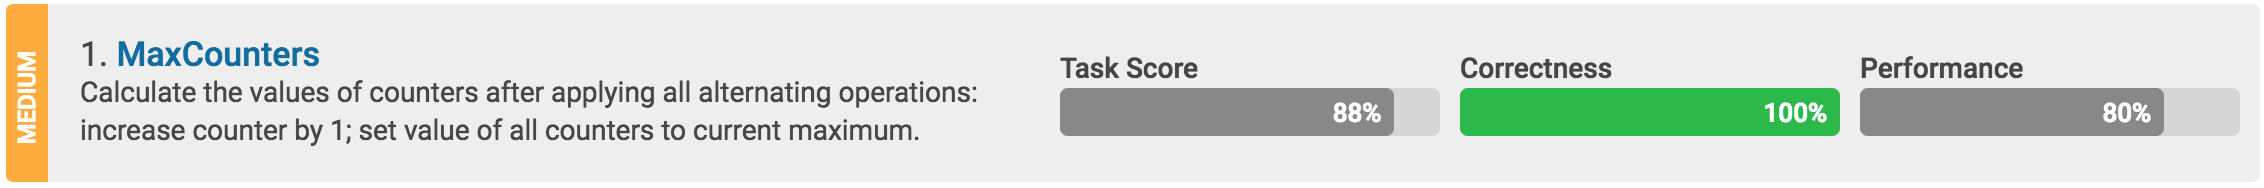

Performance 점수가 80% 가 나왔습니다.

max counter 연산을 할때 counters에 (N + 1) 개의 배열을 반복적으로 할당하는 것 때문이라고 생각했습니다.
```python
if a == N + 1:
    counters = [max_value] * (N + 1)
    continue
```

문제를 해결하는 방법은 max counter 연산을 할때 새로운 배열을 할당하는 것이 아니라,
max를 저장해 놓고 counters 를 업데이트 할 때 저장해 놓은 max 값을 이용하는 것입니다.

A[3] = 6 시점에서 counters = (2, 2, 2, 2, 2) 가 되어야 하지만
실제 (2, 2, 2, 2, 2) 배열을 만들지 않고, '2' 라는 숫자가 각 자리에 있어야 한다고 생각하고(저장해 놓고)
increase(X) 연산을 할때 저장해 놓은 2에다가 increase(X) 연산을 하는 것 입니다.

In [11]:
def solution(N, A):
    counters = [0] * (N + 1)
    lazy_max_value = max_value = 0
    for a in A:
        if a == N + 1:
            lazy_max_value = max_value # 현재 max_value를 lazy_max_value에 저장합니다.
            continue
        counters[a] = max(lazy_max_value, counters[a]) + 1 
        # 증가 연산을 할때 저장해 놓은 lazy_max_value와 실제 counters[a]를 비교해서 큰 수에 증가 연산을 합니다. 
        # swift의 lazy 기능(인스턴스를 미리 생성해 두지 않고, 실제 접근시 생성한다.) 과 비슷한 아이디어라는 생각을 했습니다.
        max_value = max(max_value, counters[a])
        
    # 마지막에 모든 counters를 순회하며 업데이트 되지 않은 counter를 업데이트 시킵니다.
    for i in range(N + 1):
        counters[i] = max(lazy_max_value, counters[i])
    return counters[1:]

solution(5, [3, 4, 4, 6, 1, 4, 4])

[3, 2, 2, 4, 2]

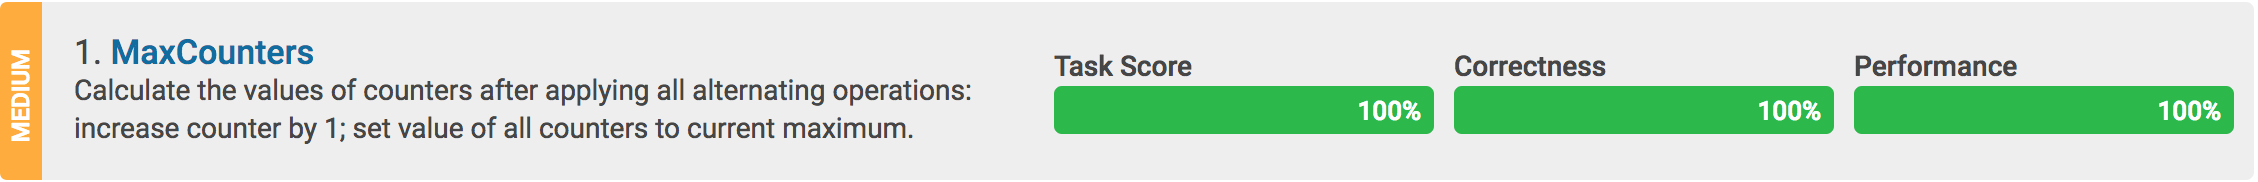

Performance 점수가 100%가 되었습니다. 

미리 배열을 업데이트 하지 않고 필요할 때 업데이트 하는 아이디어가 굉장히 좋았던거 같습니다.